# ARIMA

In [27]:
# Packages
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np
import sys
import os
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)
new_path = os.path.join(os.path.dirname(current_dir), '../Source')
print(new_path)
sys.path.append(new_path)
from ARIMA_Forecast_Functions import *

c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\Fixed_Test_Set_Diagnostics
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source


## Load data

In [28]:
# Read excel in Fixed_Test_Set.xlsx
df = pd.read_excel('Fixed_Test_Set.xlsx')
df

,Date,Broken Machines,Total Machines,Percent Broken,Revenue Losses,7DMA,Outlier,Outlier 7DMA,Train
0,2020-10-25,354.0,6818.0,5.192138,221250.0,NaN,False,NaN,True
1,2020-10-26,373.0,6844.0,5.450029,233125.0,NaN,False,NaN,True
2,2020-10-27,427.0,7488.0,5.702457,266875.0,NaN,False,NaN,True
3,2020-10-28,391.0,8294.0,4.714251,244375.0,NaN,False,NaN,True
4,2020-10-29,374.0,7461.0,5.012733,233750.0,NaN,False,NaN,True
...,...,...,...,...,...,...,...,...,...
1577,2025-02-18,1359.0,11832.0,11.485801,849375.0,11687.571429,False,11671.714286,False
1578,2025-02-19,1190.0,11835.0,10.054922,743750.0,11716.000000,False,11671.714286,False
1579,2025-02-20,1207.0,11990.0,10.066722,754375.0,11756.428571,False,11671.714286,False
1580,2025-02-21,1110.0,11907.0,9.322247,693750.0,11824.857143,False,11671.714286,False


## ARIMA

In [29]:
# Train/test split
train_df = df.query('Train == 1').reset_index(drop=True)
test_df = df.query('Train == 0').reset_index(drop=True)
print(len(train_df), len(test_df))

1552 30


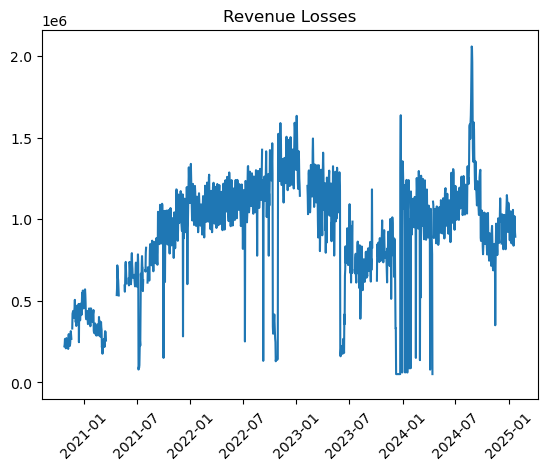

In [30]:
# Check train_df series
plt.plot(train_df['Date'], train_df['Revenue Losses'])
plt.title('Revenue Losses')
# handle x axis labels
plt.xticks(rotation=45)
plt.show()

In [31]:
# Run arima_forecast on train_df
model, forecast_df, orig_df = arima_forecast(train_df)
forecast_values = forecast_df['yhat']
lower_series = forecast_df['yhat_lower']
upper_series = forecast_df['yhat_upper']

ARIMA forecast started at: 2025-02-26 21:13:29
Data preparation completed in: 0.00 minutes
Feature creation completed in: 0.00 minutes
Created 49 outlier features and 3 missing features
Starting ARIMA model fitting...


c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\ARIMA_Forecast_Functions.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_missing['Revenue Losses'], lam = stats.boxcox(no_out_missing['Revenue Losses'])
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\ARIMA_Forecast_Functions.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = [1 if j == i else 0 for j in range(len(df))]
c:\Users\ijyli\repo\mcbroken-forecasting\Finalize

ARIMA model fitting completed in: 3.58 minutes
Final ARIMA model:                                       SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -3002.744
Date:                             Wed, 26 Feb 2025   AIC                           6121.487
Time:                                     21:17:03   BIC                           6347.522
Sample:                                          0   HQIC                          6211.326
                                             - 365                                         
Covariance Type:                               opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
interc

c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
# For plotting that follows, make orig_df orig_df plus test_df
orig_df = pd.concat([orig_df, test_df])


In [33]:
# Model summary
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -3002.744
Date:                             Wed, 26 Feb 2025   AIC                           6121.487
Time:                                     21:17:04   BIC                           6347.522
Sample:                                          0   HQIC                          6211.326
                                             - 365                                         
Covariance Type:                               opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                      -7.1595      6.005     -1.192      0.233 

In [34]:
# Check residuals
def plot_arima_residuals(fit, lags=10, bins=20):
    """
    Generates and displays a suite of residual plots for ARIMA models 
    fitted using pmdarima's auto_arima.

    Args:
        fit: The fitted ARIMA model object from pmdarima's auto_arima.
        lags: Number of lags to plot in the ACF.
        bins: Number of bins for the histogram.
    """

    residuals = fit.resid()  # Use fit.resid() for pmdarima
    fitted_values = fit.fittedvalues() # Use fit.fittedvalues()

    # print(residuals)
    # print(fitted_values)

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # 1. Time Series Plot of Residuals
    axes[0, 0].plot(residuals)
    axes[0, 0].set_title('Residuals over Time')
    axes[0, 0].set_xlabel('Time')  # More general x-axis label
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].grid(True)

    # 2. Histogram of Residuals
    axes[0, 1].hist(residuals, bins=bins)
    axes[0, 1].set_title('Histogram of Residuals')
    axes[0, 1].set_xlabel('Residuals')
    axes[0, 1].set_ylabel('Frequency')

    # 3. Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot of Residuals')

    # 4. ACF Plot
    plot_acf(residuals, lags=lags, ax=axes[1, 1])
    axes[1, 1].set_title('Autocorrelation Function (ACF)')

    # 5. Residuals vs. Fitted Values
    axes[2, 0].scatter(fitted_values, residuals)
    axes[2, 0].set_title('Residuals vs. Fitted Values')
    axes[2, 0].set_xlabel('Fitted Values')
    axes[2, 0].set_ylabel('Residuals')
    axes[2, 0].grid(True)

    fig.delaxes(axes[2, 1])  # Remove the empty subplot

    plt.tight_layout()
    plt.show()

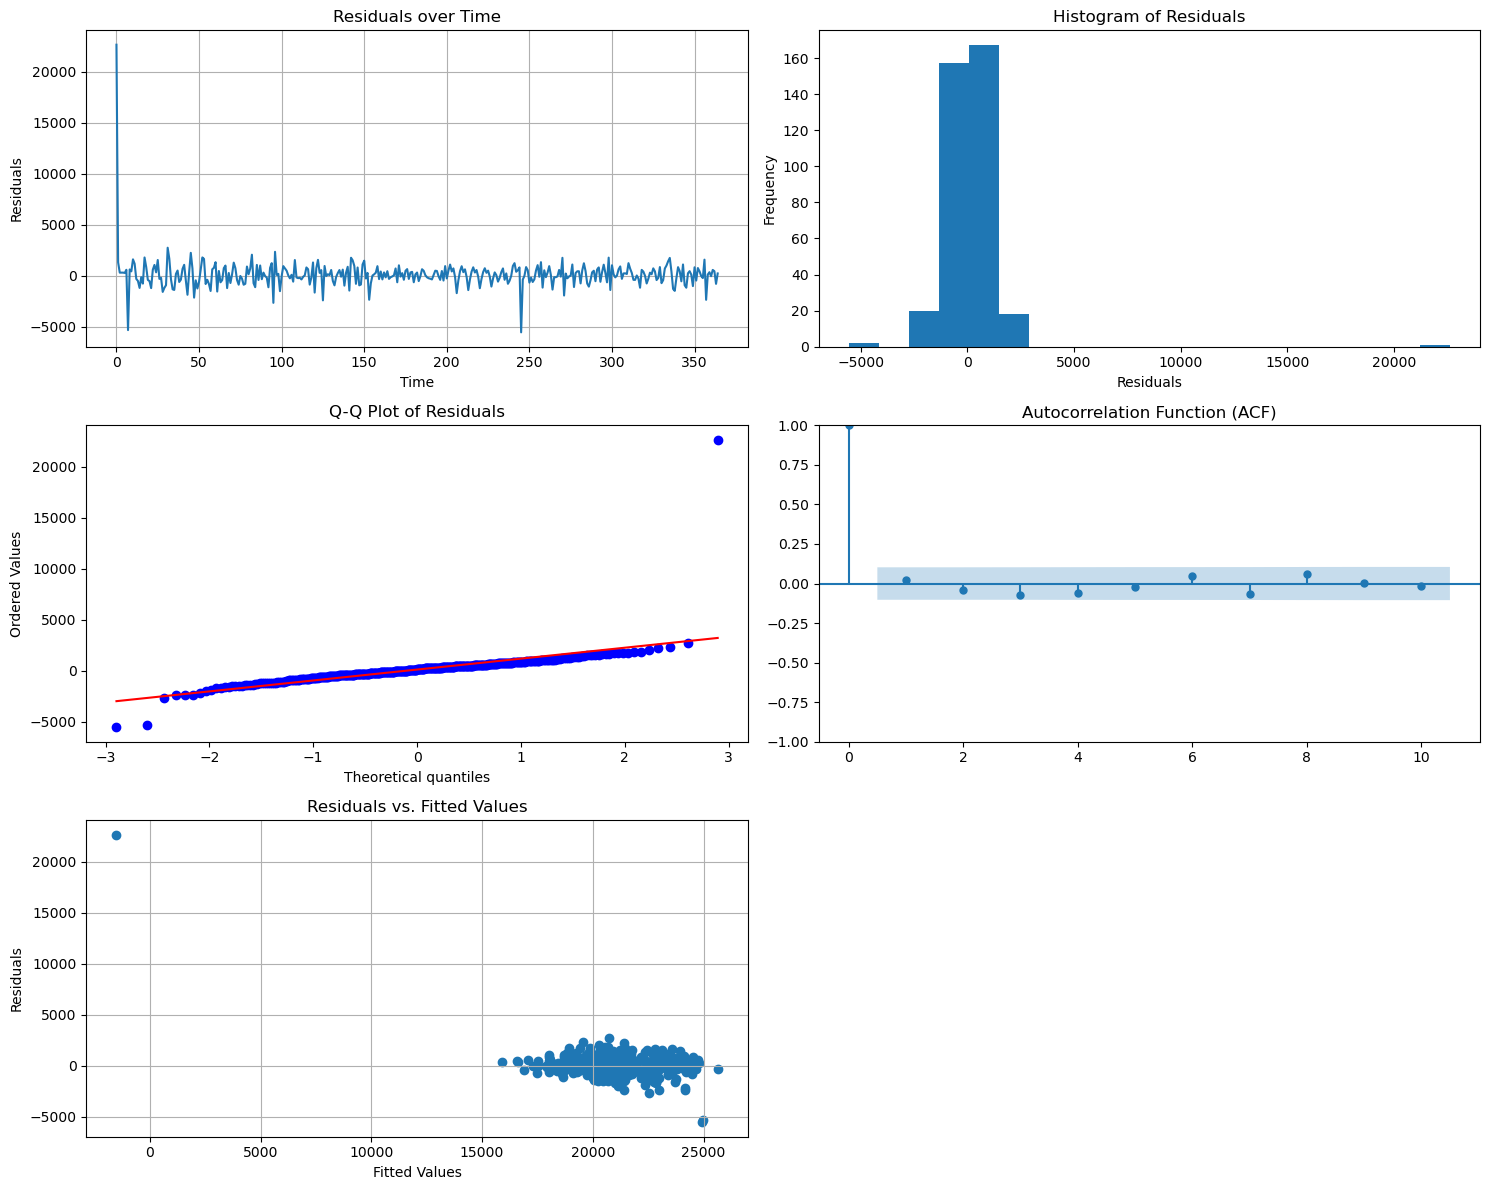

In [35]:
plot_arima_residuals(model)

Unclear how to fix lone outlier residual... it already has a dedicated exogenous variable...

Note: similar issue for the first observation keeps occuring regardless of when the training data begins (ie regardless of 1 year or 2 year training data)...

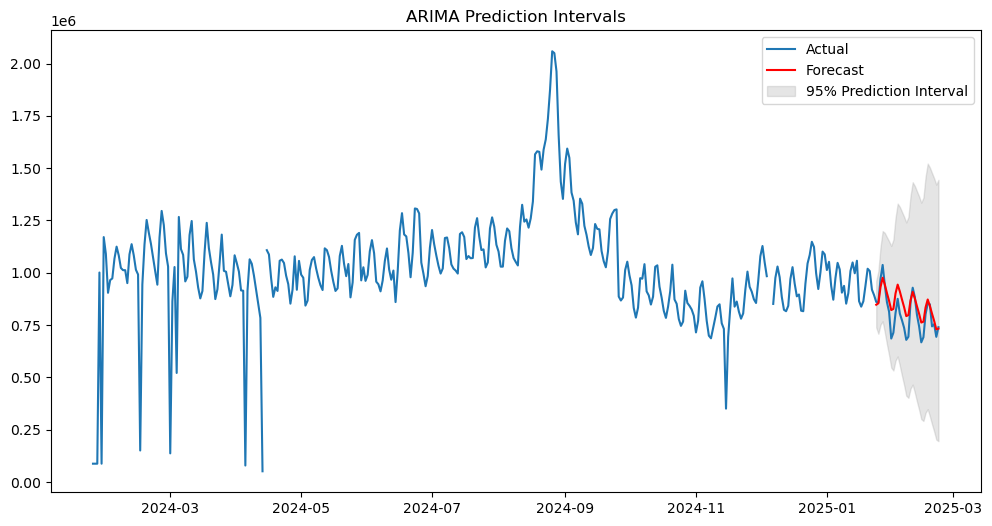

In [36]:
# Plot intervals
plt.figure(figsize=(12, 6))
plt.plot(orig_df['Date'], orig_df['Revenue Losses'], label='Actual')  # Original data
plt.plot(test_df['Date'], forecast_values, label='Forecast', color='red')  # Original forecast

plt.fill_between(test_df['Date'], lower_series, upper_series, color='gray', alpha=0.2, label=f'95% Prediction Interval')

plt.title('ARIMA Prediction Intervals')
plt.legend()
plt.show()

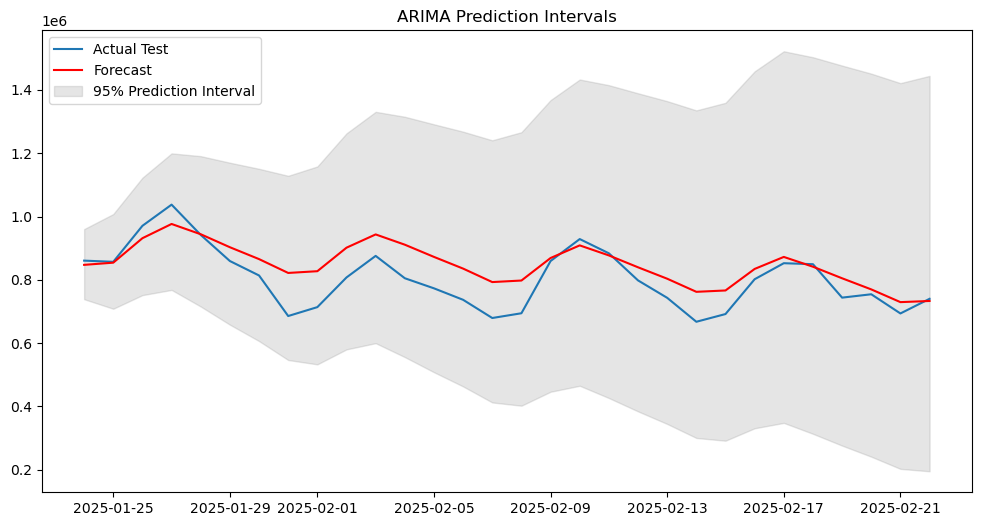

In [37]:
# Plot intervals
plt.figure(figsize=(12, 6))
plt.plot(test_df['Date'], test_df['Revenue Losses'], label='Actual Test')
plt.plot(test_df['Date'], forecast_values, label='Forecast', color='red')  # Original forecast

plt.fill_between(test_df['Date'], lower_series, upper_series, color='gray', alpha=0.2, label=f'95% Prediction Interval')

plt.title('ARIMA Prediction Intervals')
plt.legend()
plt.show()

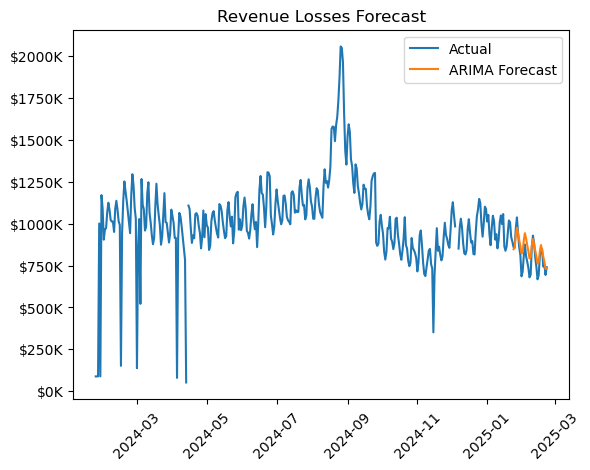

MAE: 54407.82930119337
RMSE: 67441.58933215991
MAPE: 7.182364266359641


In [38]:
plt.plot(orig_df['Date'], orig_df['Revenue Losses'], label="Actual")
plt.plot(test_df['Date'], forecast_values, label="ARIMA Forecast")
# Title of Revenue Losses Forecast
plt.title('Revenue Losses Forecast')
# Format y axis as thousands of dollars
plt.gca().yaxis.set_major_formatter((lambda x, _: f'${int(x/1000)}K'))
# Rotate x axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Check MAE, RMSE on test set
mae = mean_absolute_error(test_df['Revenue Losses'], forecast_values)
rmse = root_mean_squared_error(test_df['Revenue Losses'], forecast_values)
print('MAE:', mae)
print('RMSE:', rmse)
# Also compute MAPE for reporting
mape = np.mean(np.abs((test_df['Revenue Losses'] - list(forecast_values)) / test_df['Revenue Losses'])) * 100
print('MAPE:', mape)

In [39]:
# 7-day seasonal naive forecast for comparison
last_7 = list(train_df['Revenue Losses'][-7:])
seasonal_naive_forecast = [last_7[i % 7] for i in range(len(test_df))]
# Set index of dates to be that of test_df
seasonal_naive_forecast_df = pd.DataFrame(seasonal_naive_forecast, index=test_df.index, columns=['Revenue Losses'])

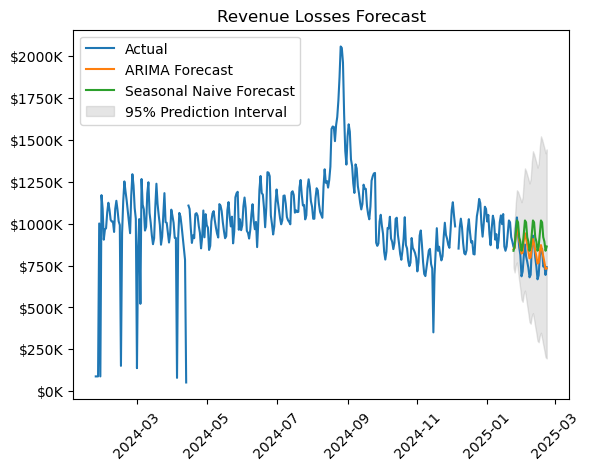

Seasonal Naive MAE: 121687.5
Seasonal Naive RMSE: 132294.89825449305
Seasonal Naive MAPE: 15.838210192694532


In [40]:
# PLot with seasonal naive forecast
orig_df = orig_df.sort_values('Date')
plt.plot(orig_df['Date'], orig_df['Revenue Losses'], label="Actual")
plt.plot(test_df['Date'], forecast_values, label="ARIMA Forecast")
# Seasonal naive forecast
plt.plot(test_df['Date'], seasonal_naive_forecast_df['Revenue Losses'], label="Seasonal Naive Forecast")
# Add prediction intervals
plt.fill_between(test_df['Date'], lower_series, upper_series, color='gray', alpha=0.2, label='95% Prediction Interval')
# Title of Revenue Losses Forecast
plt.title('Revenue Losses Forecast')
# Format y axis as thousands of dollars
plt.gca().yaxis.set_major_formatter((lambda x, _: f'${int(x/1000)}K'))
# Rotate x axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()

# MAE, RMSE, MAPE for seasonal naive forecast
mae = mean_absolute_error(test_df['Revenue Losses'], seasonal_naive_forecast)
rmse = root_mean_squared_error(test_df['Revenue Losses'], seasonal_naive_forecast)
print('Seasonal Naive MAE:', mae)
print('Seasonal Naive RMSE:', rmse)
mape = np.mean(np.abs((test_df['Revenue Losses'] - seasonal_naive_forecast) / test_df['Revenue Losses'])) * 100
print('Seasonal Naive MAPE:', mape)

Pretty good fit.